# Question Q14

*Question*: Do you/your organization follow the practice and principles of ML-Ops in ML-enabled system projects? For instance, do you have an automated pipeline to retrain and deploy your ML models?

*Answer Type*: Single Option and Free Field

*Options*: [Yes. Please optionally provide details about your ML-Ops approach:; No]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values, format_wordcloud_text
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In [3]:
# For PROFES, we discarded suspended submissions (e.g., remove those who didn't complete the survey).
dataframe_obj.df.drop(dataframe_obj.df[dataframe_obj.df['Status'] == 'Suspended (22)'].index, inplace = True)

In [4]:
# question options
principles = {
    'Q14_Model_Deploy_Pipeline_Yes': 'Yes',
    'Q14_Model_Deploy_Pipeline_No': 'No'
}

### Basic Analysis

In [5]:
dataframe_obj.df[['Q14_Model_Deploy_Pipeline_Yes', 'Q14_Model_Deploy_Pipeline_No',
                  'Q14_Model_Deploy_Pipeline_Yes_Free', ]].head()

,Q14_Model_Deploy_Pipeline_Yes,Q14_Model_Deploy_Pipeline_No,Q14_Model_Deploy_Pipeline_Yes_Free
0,not quoted,not quoted,-99
1,not quoted,quoted,-99
2,not quoted,quoted,-99
3,not quoted,quoted,-99
4,quoted,not quoted,-99


In [6]:
indexes = []
values = []
for principle in principles:
    indexes.append(principles[principle])
    values.append(dataframe_obj.df[principle].value_counts()['quoted'])

In [7]:
# compute total of unique answers in this question
total = 0
for idx, row in dataframe_obj.df.iterrows():
    
    if row['Q14_Model_Deploy_Pipeline_Yes'] == 'quoted' or row['Q14_Model_Deploy_Pipeline_No'] == 'quoted':
        total += 1

total_answers = 'N = ' + str(total)
total_answers_int = total

In [8]:
# plot object
q14_plot = PlotUtils(pd.DataFrame(
    data={'Follow Principles?': indexes, 'Answers': values}
).sort_values(by=['Answers'], ascending=False))

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-aVZriNVE\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


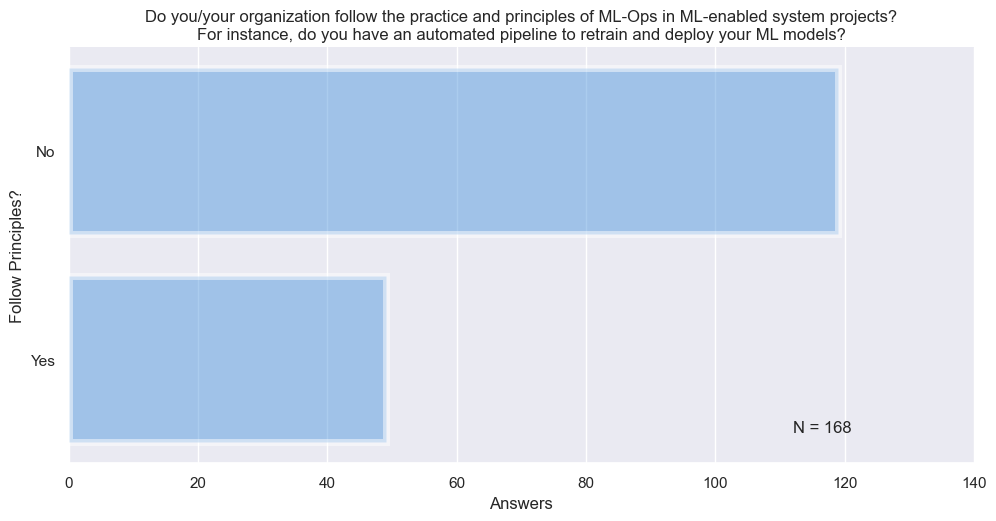

In [9]:
q14_plot.single_barplot(x_axis="Answers", y_axis="Follow Principles?",
                       title="Do you/your organization follow the practice and principles of ML-Ops in ML-enabled system projects?\nFor instance, do you have an automated pipeline to retrain and deploy your ML models?",
                       x_label="Answers", y_label="Follow Principles?", x_label_rotation=0, color="#429bf5", total_answers=total_answers)

#### WordCloud

In [10]:
principles_free = list(filter(lambda a: str(a) != '-99', 
                           list(dataframe_obj.df['Q14_Model_Deploy_Pipeline_Yes_Free'])))
principles_free = list(filter(lambda a: str(a) != '-66', principles_free))
principles_free = list(filter(lambda a: str(a) != 'nan', principles_free))

In [11]:
principles_words = format_wordcloud_text(texts=principles_free, use_sep=False)

In [12]:
# plot object
q14_wc_plot = PlotUtils(pd.DataFrame(
    data={'Word': list(principles_words.keys()), 'Weight': list(principles_words.values())}
))

In [13]:
list(q14_wc_plot.df['Word'])

['MLOps nv2 pipeline',
 'Bento ML, Vertex AI (Google), MLFlow',
 'Microsoft Azure Continuous Integration Pipeline',
 'We developed internal pipeline to monitor and deploy our models easily.',
 'Azure Devops & Kubernetes ',
 'We have our own pipelines, its currently being documented as an orientation guide',
 'Git version control with proper documentation for both deployment and development side',
 'AWS Sagemaker MLOPS',
 'Mainly tools provided by Clouds',
 'In some project we are using Dataiku as MLOps platform. In some, we are using apache airflow to manage ML pipelines.',
 'MLFlow/DataBricks',
 'airflow, gitlab CI/CD',
 'Dataiku',
 'Use some cloud solution',
 'We are trying... ',
 'Being Implemented',
 'Partially. There are some pipelines but .... ',
 'Time-based retraining',
 'Yes we are using an automated ML tool',
 'Continous Integration and Monitoring',
 'MXE',
 'using LUIS.AI api',
 'We have pipelines to regularly retrain,update and deploy our models in production, taking the la

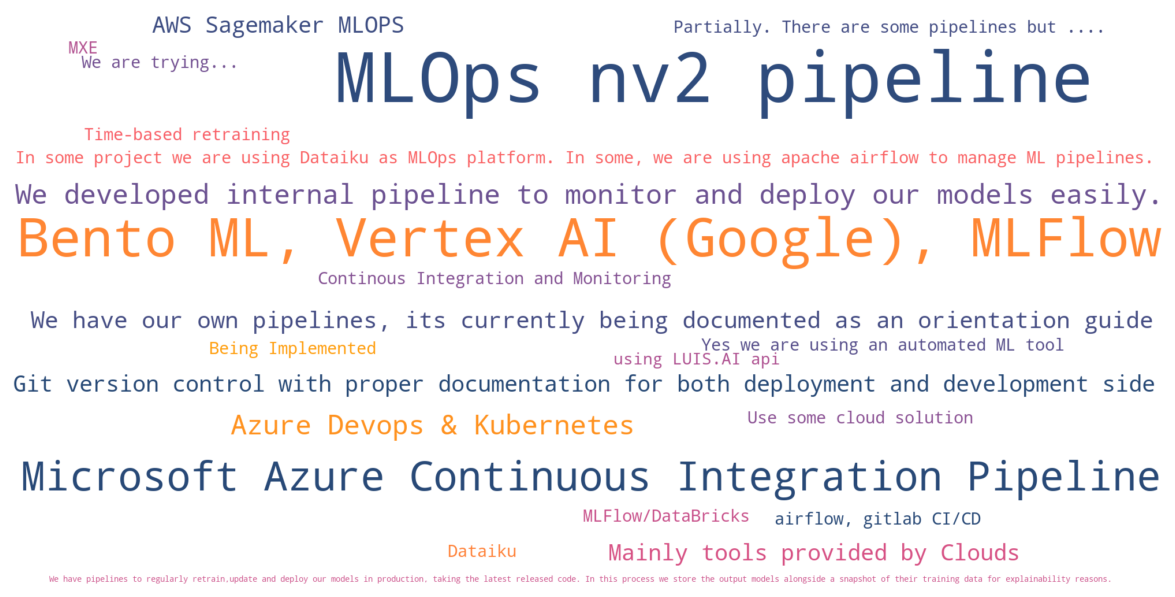

In [14]:
q14_wc_plot.wordcloud("Word", 'Weight')

### Bootstrapping Analysis

In [15]:
prefix = "Q14_Model_Deploy_Pipeline_"

In [16]:
# the possible answers are the ones in columns
valid_options_list = [principle_column.split(prefix)[1] for principle_column in principles]

In [17]:
# answers could be composed by more than one option, so we will have an array of selected options
valid_answers_list = []
for idx, row in dataframe_obj.df.iterrows():
    answer = []
    for option in valid_options_list:
        if row[prefix + option] == 'quoted':
            answer.append(option)
            
    valid_answers_list.append(answer)

In [18]:
replacements = total_answers_int # equals n - total valid answers
population_sample_size = 1000 

bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, replacements, population_sample_size, 95)

In [19]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping(question_type="multiple")

In [20]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
for idx in bootstrapped_dict_data:
    indexes += [idx for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    values += bootstrapped_dict_data[idx]['population']

In [21]:
values = [100 * v for v in values]

In [22]:
# plot object for bootstrapped data
q14_boot_plot = PlotUtils(pd.DataFrame(
    data={'Follow Principles?': indexes, 'Value': values}
).sort_values(by=['Value'], ascending=False))

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-aVZriNVE\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


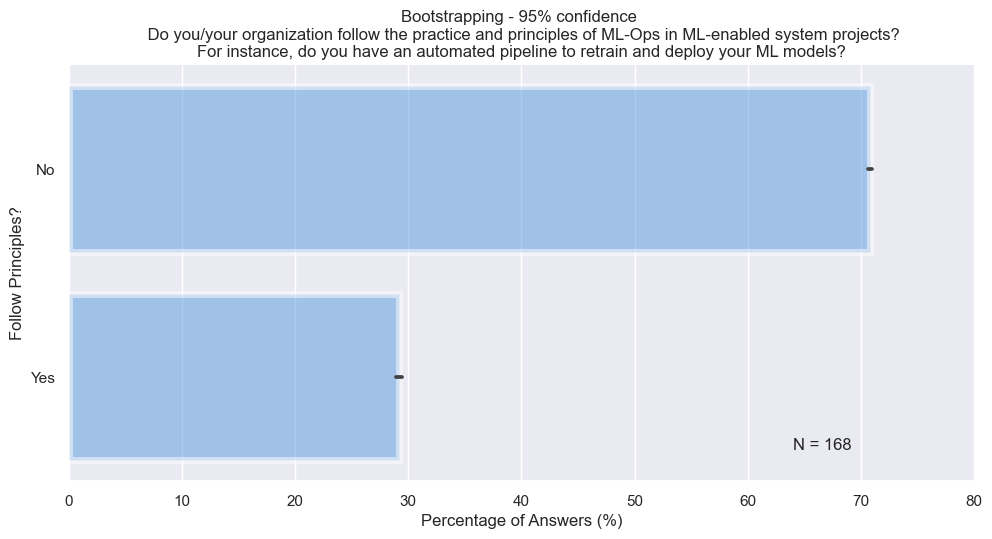

In [23]:
q14_boot_plot.single_barplot(x_axis="Value", y_axis="Follow Principles?", 
                       title="Bootstrapping - 95% confidence \n Do you/your organization follow the practice and principles of ML-Ops in ML-enabled system projects?\nFor instance, do you have an automated pipeline to retrain and deploy your ML models?",
                       x_label="Percentage of Answers (%)", y_label="Follow Principles?", x_label_rotation=0, color="#429bf5",
                       total_answers=total_answers)

In [24]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

Option: (Lower Value, Mean, Upper Value)
Yes:(0.2897438280710839, 0.2919285714285714, 0.29411331478605895)
No:(0.7058866852139412, 0.7080714285714287, 0.7102561719289162)


In [25]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':: P = ' + str(round((bootstrapped_dict_data[idx]['confidence'][1] * 100), 3)) + " [" + str(round((bootstrapped_dict_data[idx]['confidence'][0] * 100), 3)) + ", " + str(round((bootstrapped_dict_data[idx]['confidence'][2] * 100), 3)) + "]")

Option: (Lower Value, Mean, Upper Value)
Yes:: P = 29.193 [28.974, 29.411]
No:: P = 70.807 [70.589, 71.026]
